In [40]:
import pandas as pd
from hnmchallenge.data_reader import DataReader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from hnmchallenge.dataset import Dataset
from hnmchallenge.filtered_dataset import FilterdDataset
from hnmchallenge.models.top_pop import TopPop
from hnmchallenge.evaluation.python_evaluation import map_at_k
from hnmchallenge.constant import *
from hnmchallenge.models.sgmc.sgmc import SGMC
from hnmchallenge.models.ease.ease import EASE
from hnmchallenge.models.itemknn.itemknn import ItemKNN 
from hnmchallenge.data_reader import DataReader
import datetime

In [41]:
dataset = FilterdDataset()
dr = DataReader()

In [62]:
user_data = dr.get_transactions()

In [65]:
unique_items = user_data[user_data['t_dat'] >= "2020-09-10"][DEFAULT_ITEM_COL].unique()

In [66]:
len(unique_items)

22069

In [59]:
user_data['t_dat'] = pd.to_datetime(user_data['t_dat'])

In [44]:
from datetime import timedelta, date
def daterange1(start_date, end_date):
     for n in range(0, int((end_date - start_date).days) + 1, 7):
         yield start_date + timedelta(n)
         
start_dt = date(2020, 7, 1)
end_dt = date(2020, 9, 22)

In [18]:
daterange = pd.date_range("2020-07-01", "2020-09-22")

In [45]:
count=[]
time=[]
for i in daterange1(start_dt, end_dt):
    count_articles = user_data[(user_data["t_dat"]>= pd.to_datetime(i))]
    data=count_articles[DEFAULT_ITEM_COL].nunique()
    count.append(data)
    time.append(i)
    

In [46]:
count

[40772,
 39521,
 38331,
 37102,
 35576,
 33971,
 32257,
 30482,
 28297,
 25899,
 22640,
 17986]

In [47]:
time

[datetime.date(2020, 7, 1),
 datetime.date(2020, 7, 8),
 datetime.date(2020, 7, 15),
 datetime.date(2020, 7, 22),
 datetime.date(2020, 7, 29),
 datetime.date(2020, 8, 5),
 datetime.date(2020, 8, 12),
 datetime.date(2020, 8, 19),
 datetime.date(2020, 8, 26),
 datetime.date(2020, 9, 2),
 datetime.date(2020, 9, 9),
 datetime.date(2020, 9, 16)]

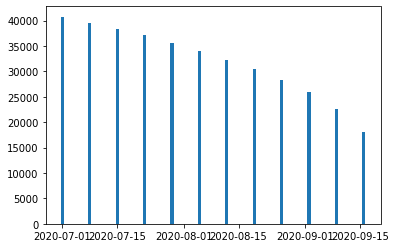

In [49]:
import matplotlib.pyplot as plt

plt.bar(time, count)
plt.show()